# Part II - Effects of  user characterisctics on duration of trips
## by  Lambiv Gills Dzenyuy


## Investigation Overview
In this investigation, I wanted to look at the user characteristics  that could be used to predict the duration of these trips. The main focus was on user_type, member_gender and bike_share_for all trip.

## Dataset Overview

There are 183412 individaual bike trips in the dataset with 15 columns covering the data for Chicago bike share for Febuary 2019


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [16]:
default_color = sb.color_palette()[0]
df.duration_sec.describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distibution of trip duration

Duration of trips  in the dataset take on a very large range of values,wiht a minimum of 61 seconds to a maximum of 85444 seconds. Plotted on a logarithmic scale, the distribution of trip durations takes a doom shape.

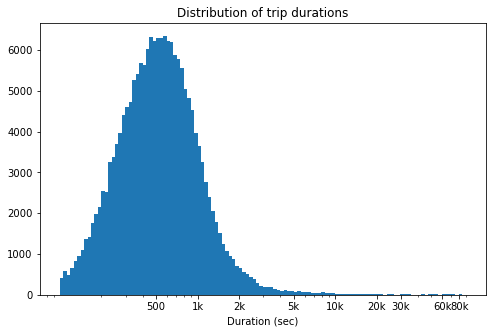

In [6]:
# there's a long tail in the distribution and plot concerntrated in a small portion, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.0, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 3e4,6e4,8e4], [500, '1k', '2k', '5k', '10k', '20k','30k','60k','80k'])
plt.title("Distribution of trip durations")
plt.xlabel('Duration (sec)')
plt.show();

## Duration vs User type
User type is an interesting factor in every organisation or business and is not different for bike share. A plot of duration vs user type indicates that thogh there are many subscribers in each quartile, customers mean duration for each quartile for customers is higher than the corresponding subscriber counterpart.

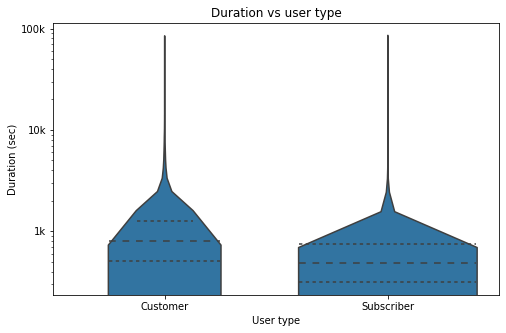

In [35]:
plt.figure(figsize=(8,5))
sb.violinplot(data=df, x='user_type', y='duration_sec',inner='quartile', color=default_color);
plt.yscale('log')
plt.yticks([1e3,1e4,1e5],['1k','10k', '100k'])
plt.title('Duration vs user type');
plt.ylabel('Duration (sec)')
plt.xlabel('User type');

## Duration vs gender distributed by user According to Bike share for all trip

The first for no bike share for all trips show that mean duration for all customer quartiles for all gender are are greater than those of the corresponding subscribers. For those whose use bike share for all duration subcribers mean durations out passes that for customers

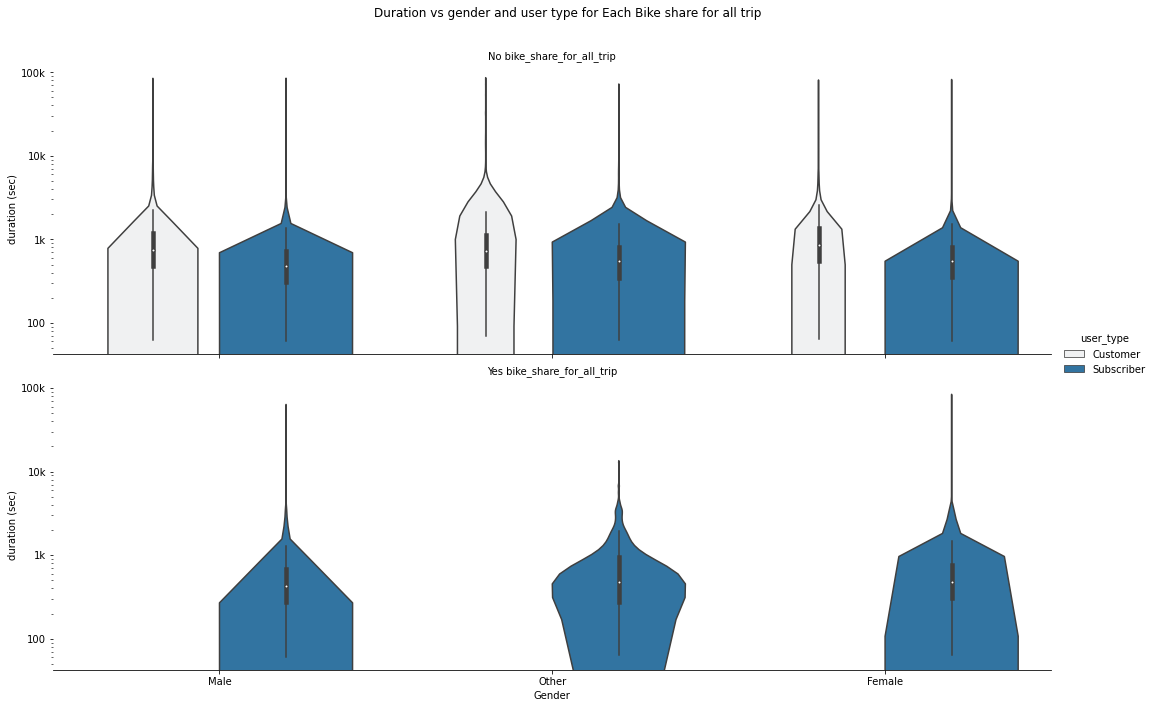

In [36]:
g = sb.catplot(x="member_gender", y="duration_sec",
                hue="user_type", row="bike_share_for_all_trip",
                data=df,
                  aspect=3, color=default_color,
                kind="violin", dodge=True);
plt.yscale('log')
plt.yticks([1e2,1e3,1e4,1e5],[100,'1k','10k','100k']);
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Duration vs gender and user type for Each Bike share for all trip')
g.set_axis_labels("Gender", "duration (sec)").set_xticklabels(["Male", "Other", "Female"]).set_titles("{row_name} {row_var}").despine(left=True); 

## Duration vs user type with bike share for all trip For Male gender
No bike share for all trip male customers  have the highest duration as compared aproximately 0 for those who use bike share in this same category. Male subscribers who use bike share for all trip have slightly high durations than male subscribers who do't

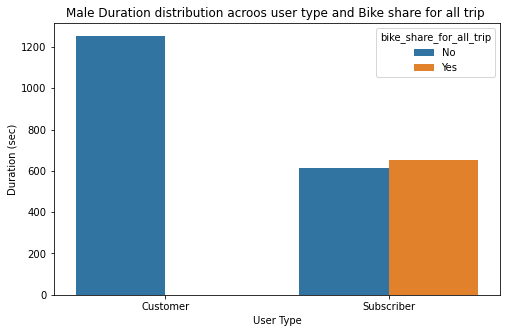

In [50]:
# bar plot of user_type,  duration  and bike share for all trip for males
plt.figure(figsize=[8,5]);
sb.barplot(data = df[df.member_gender=='Male'], x = 'user_type', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           ci=None);
plt.title('Male Duration distribution acroos user type and Bike share for all trip ');
plt.xlabel('User Type');
plt.ylabel('Duration (sec)');

## Duration vs user type with bike share for all trip For Other gender
Other (gender) customers who don't use bike share for all trip have a high mean duration than those who use bike share for all trip and all other subscribers of gender Other. other subscribers who don't use bike share have a mean duration slightly higher than that for those who use bike share for all trip for this same gender

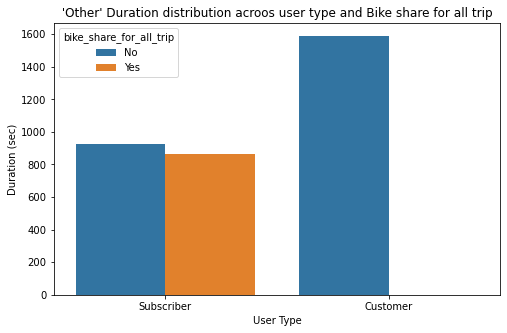

In [49]:
# bar plot of user_type,  duration  and bike share for all trip for Other gender
plt.figure(figsize=[8,5]);
sb.barplot(data = df[df.member_gender=='Other'], x = 'user_type', y = 'duration_sec', hue = 'bike_share_for_all_trip',  ci=None, dodge = 0.4);
plt.title('Gender  \'Other\' Duration distribution acroos user type and Bike share for all trip ');
plt.xlabel('User Type');

plt.ylabel('Duration (sec)');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 